In [229]:
import pandas as pd
import os
import csv
import seaborn as sb
import matplotlib.pyplot as plt


from collections import defaultdict, Counter
from matplotlib import dates as mplDates
from collections import defaultdict, Counter

sb.set()

In [23]:
for dirname, _, filenames in os.walk("cd../Open Classroom/Biden vs Trump tweet"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [24]:
trump = pd.read_csv(r"D:\Open Classroom\Data Files\Biden vs Trump tweet\hashtag_donaldtrump.csv", lineterminator = "\n")
#using the lineterminator will remove error arising from large data loading ##Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

In [25]:
biden = pd.read_csv(r"D:\Open Classroom\Data Files\Biden vs Trump tweet\hashtag_joebiden.csv", engine = "python")
#using the engine will remove error arising from large data loading ##Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

In [26]:
pd.set_option("display.max_columns", 21)

In [27]:
trump.head().T

,0,1,2,3,4
created_at,2020-10-15 00:00:01,2020-10-15 00:00:01,2020-10-15 00:00:02,2020-10-15 00:00:02,2020-10-15 00:00:08
tweet_id,1.31653e+18,1.31653e+18,1.31653e+18,1.31653e+18,1.31653e+18
tweet,#Elecciones2020 | En #Florida: #JoeBiden dice ...,"Usa 2020, Trump contro Facebook e Twitter: cop...","#Trump: As a student I used to hear for years,...",2 hours since last tweet from #Trump! Maybe he...,You get a tie! And you get a tie! #Trump ‘s ra...
likes,0,26,2,0,4
retweet_count,0,9,1,0,3
source,TweetDeck,Social Mediaset,Twitter Web App,Trumpytweeter,Twitter for iPhone
user_id,3.60667e+08,3.31618e+08,8.43647e+06,8.28356e+17,4.74138e+07
user_name,El Sol Latino News,Tgcom24,snarke,Trumpytweeter,Rana Abtar - رنا أبتر
user_screen_name,elsollatinonews,MediasetTgcom24,snarke,trumpytweeter,Ranaabtar
user_description,🌐 Noticias de interés para latinos de la costa...,Profilo ufficiale di Tgcom24: tutte le notizie...,"Will mock for food! Freelance writer, blogger,...","If he doesn't tweet for some time, should we b...","Washington Correspondent, Lebanese-American ,c..."


In [28]:
biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,ðŸŒ� Noticias de interÃ©s para latinos de la c...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.31652929585929e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,809904438.0,Cheri A. ðŸ‡ºðŸ‡¸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",2012-09-08 01:03:57,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.3165293050069524e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3494182277.0,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21,1536.0,Golden Valley Arizona,46.3040364,-109.17143119999999,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.3165293080815575e+18,@chrislongview Watching and setting dvr. Letâ€...,0.0,0.0,Twitter for iPhone,8.242596012018524e+17,Michelle Ferg,MichelleFerg4,NaN,2017-01-25 14:16:17,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529312741253e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032806955356545e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",36.7014631,-118.75599740000001,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [29]:
trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [30]:
print("Trump : ", trump.shape)
print("Biden : ", biden.shape)

Trump :  (697100, 21)
Biden :  (453802, 21)


In [93]:
#Convert respective series to date and time series
trump["created_at"] = pd.to_datetime(trump["created_at"], format = "%Y-%m-%d")
biden["created_at"] = pd.to_datetime(biden["created_at"], format = "%Y-%m-%d", errors = "coerce")

trump["user_join_date"] = pd.to_datetime(trump["user_join_date"], format = "%Y-%m-%d")
biden["user_join_date"] = pd.to_datetime(biden["user_join_date"], format = "%Y-%m-%d", errors = "coerce")

trump["collected_at"] = pd.to_datetime(trump["collected_at"], format = "%Y-%m-%d")
biden["collected_at"] = pd.to_datetime(biden["collected_at"], format = "%Y-%m-%d", errors = "coerce")

## The code with errors='coerce' will replace the invalid parsing with NaN.

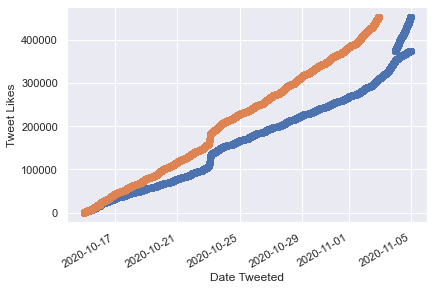

In [134]:
biden_created_at = biden["created_at"].dropna(axis = "index", how = "any").head(453600)
trump_created_at = trump["created_at"].dropna(axis = "index", how = "any").head(453600)

user_followers = biden["user_followers_count"].dropna(axis = "index", how = "any").head(453600)
total_days = 0
days_list = []
while total_days != 453600:
    total_days += 1
    days_list.append(total_days)
days_list
    
biden["created_at"].max() - biden["created_at"].min()
plt.plot_date(biden_created_at, days_list)
plt.gcf().autofmt_xdate()
dateFmt = mplDates.DateFormatter("%Y, %m, %d")
plt.tight_layout()
plt.xlabel("Date Tweeted")
plt.ylabel("Tweet Likes")


plt.plot_date(trump_created_at, days_list)

plt.show()

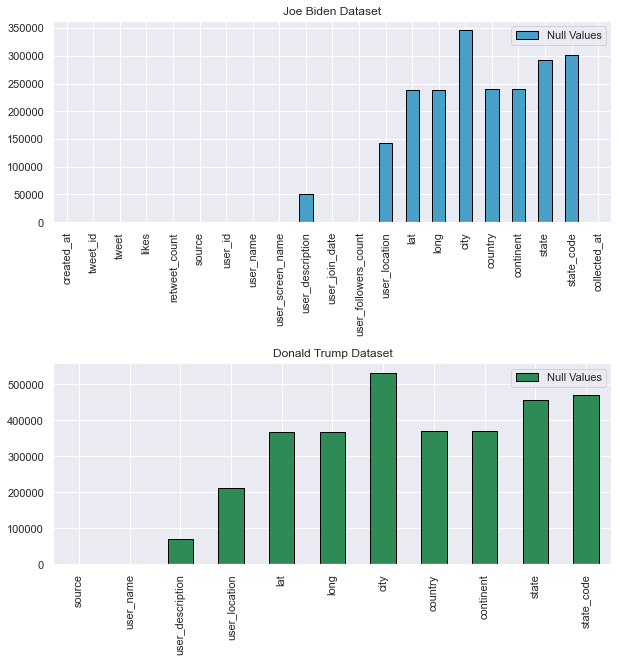

In [66]:
biden_na_vals = pd.DataFrame({"Null Values": biden.isna().sum()})
biden_na_vals = biden_na_vals.loc[biden_na_vals["Null Values"] > 0]
biden_na_vals
trump_na_vals = pd.DataFrame({"Null Values": trump.isna().sum()})
trump_na_vals = trump_na_vals.loc[trump_na_vals["Null Values"] > 0]
trump_na_vals

#Visualization Args
barcolors = ['#87B88C', '#9ED2A1', '#E7E8CB', '#48A0C9', '#2A58A1', '#2E8B55', '#DF3659', 'Grey']
barstyle = {"edgecolor": "black", "linewidth": 1}

#Create a Subplot to represent the Null Values for each dataset
fig, ax = plt.subplots(2, 1, figsize = (10, 10), gridspec_kw={'hspace':0.7})

biden_na_vals.plot.bar(color = barcolors[3], **barstyle, ax = ax[0])
ax[0].set_title("Joe Biden Dataset")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

trump_na_vals.plot.bar(color = barcolors[5], **barstyle, ax = ax[1])
ax[1].set_title("Donald Trump Dataset")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
plt.show()


In [82]:
biden_vs_trump = pd.concat([biden, trump])
biden_vs_trump.to_csv(r"D:\Open Classroom\Data Files\Biden vs Trump tweet\biden_vs_trump_dataframe.csv")

In [83]:
biden["candidate"] = "biden"
trump["candidate"] = "trump"

In [88]:
candidate = pd.concat([biden, trump]).sort_values(["created_at"])
candidate.to_csv(r"D:\Open Classroom\Data Files\Biden vs Trump tweet\candidate_analysis.csv")

In [248]:
df = pd.read_csv(r"D:\Open Classroom\Data Files\Biden vs Trump tweet\candidate_analysis.csv", encoding = "latin1", low_memory = False)
df.drop(columns = ["Unnamed: 0"], inplace = True)
pd.set_option("max_columns", 100)
df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01.000000000,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,Ã°Å¸Åï¿½ Noticias de interÃÂ©s para latinos ...,2011-08-23 15:33:45.000000000,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00.000000000,biden
1,2020-10-15 00:00:01.000000000,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20.000000000,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,trump
2,2020-10-15 00:00:01.000000000,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,ð Noticias de interÃ©s para latinos de la c...,2011-08-23 15:33:45.000000000,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00.000000000,trump
3,2020-10-15 00:00:02.000000000,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11.000000000,1185.0,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump
4,2020-10-15 00:00:02.000000000,1.316529227471237e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.28355589206057e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",2017-02-05 21:32:17.000000000,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,trump


In [249]:
df["country"].replace({"United States": "United States of America"}, inplace = True)

In [250]:
candidate_grp = df.groupby("candidate")
candidate_grp = candidate_grp.get_group("biden")
candidate_grp["country"].value_counts().head().to_frame().style.background_gradient(cmap = "Greens")

,country
United States of America,129627
United Kingdom,10944
India,7209
France,7198
Canada,6920


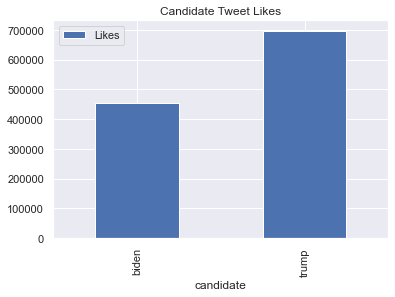

In [251]:
cand = df.groupby("candidate").likes.count()#.to_frame()
cand.plot(x = "candidate", y = "likes", kind = "bar", title = "Candidate Tweet Likes", label = "Likes", legend = True)
plt.show()

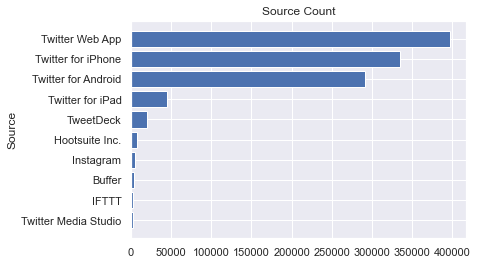

In [252]:
#source = df.groupby("source").source.count().head(15).sort_values(ascending = True)
#source.plot(x = "source", y = "count", kind = "barh")
#source["country"].value_counts()
#round(df["source"].value_counts(normalize = False), 2).head(10).to_frame().style.background_gradient(cmap = "Reds")

with open("D:\Open Classroom\Data Files\Biden vs Trump tweet\candidate_analysis.csv", encoding = "latin1") as tweet:
    tweetReader = csv.DictReader(tweet)
    tweetCounter = Counter()
    
    for line in tweetReader:
        tweetCounter.update(line["source"].split("-"))
source = []
count = []
for i in tweetCounter.most_common(10):
    source.append(i[0])
    count.append(i[1])
source.reverse()
count.reverse()
plt.barh(source, count)
plt.title("Source Count")
plt.ylabel("Source")
plt.show()

In [254]:
df["created_at"] = pd.to_datetime(df["created_at"], format = "%Y-%m-%d")
df.set_index("created_at", inplace = True)
df.head()

,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
created_at,,,,,,,,,,,,,,,,,,,,,
2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,Ã°Å¸Åï¿½ Noticias de interÃÂ©s para latinos ...,2011-08-23 15:33:45.000000000,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00.000000000,biden
2020-10-15 00:00:01,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20.000000000,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,trump
2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,ð Noticias de interÃ©s para latinos de la c...,2011-08-23 15:33:45.000000000,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00.000000000,trump
2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11.000000000,1185.0,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump
2020-10-15 00:00:02,1.316529227471237e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.28355589206057e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",2017-02-05 21:32:17.000000000,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,trump


In [263]:
df.info()
#max_likes = df["likes"].resample("w").max()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1150902 entries, 2020-10-15 00:00:01 to NaT
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   tweet_id              1150845 non-null  object 
 1   tweet                 1150845 non-null  object 
 2   likes                 1150784 non-null  object 
 3   retweet_count         1150776 non-null  float64
 4   source                1149476 non-null  object 
 5   user_id               1150776 non-null  object 
 6   user_name             1150745 non-null  object 
 7   user_screen_name      1150776 non-null  object 
 8   user_description      1029033 non-null  object 
 9   user_join_date        1150701 non-null  object 
 10  user_followers_count  1150772 non-null  object 
 11  user_location         795774 non-null   object 
 12  lat                   544586 non-null   object 
 13  long                  544586 non-null   object 
 14  city             